In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
budget_df = pd.read_excel('annual_operating_budgets.xlsx')
budget_df['Annual Operating Budget (USD)'] = budget_df['Annual Operating Budget (USD)'] / 1e6

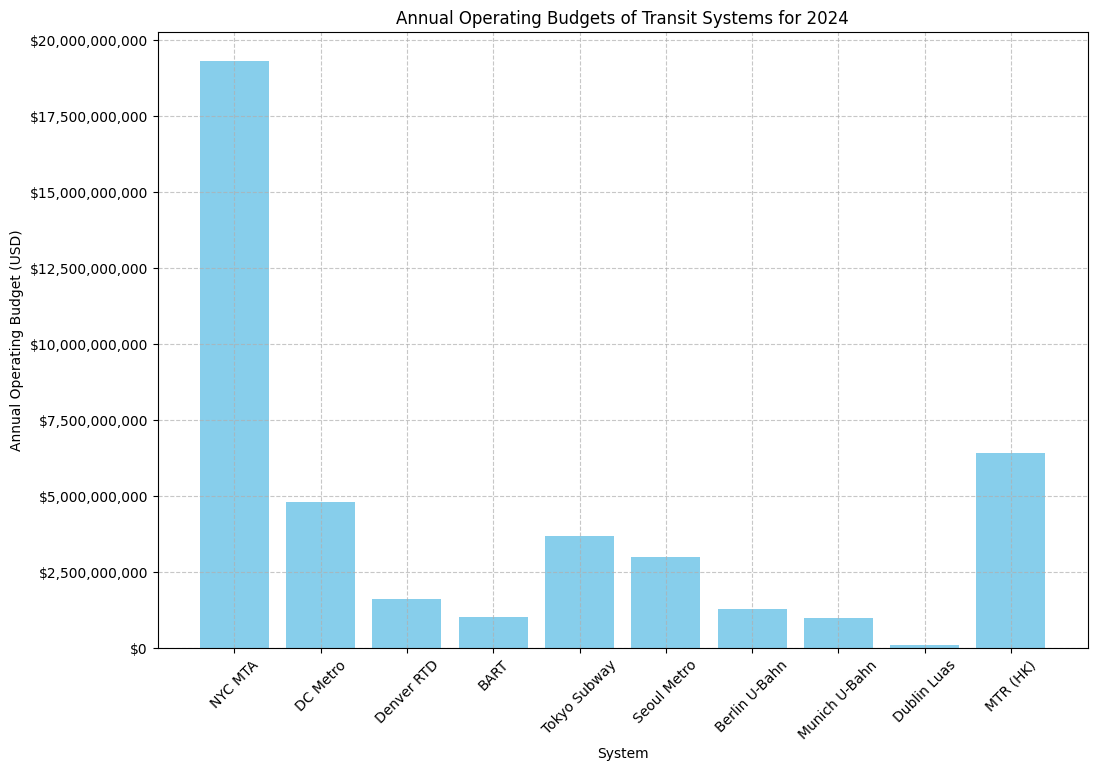

In [8]:
plt.figure(figsize=(12, 8))
plt.bar(budget_df['System'], budget_df['Annual Operating Budget (USD)'] * 1e6, color='skyblue')
plt.ylabel('Annual Operating Budget (USD)')
plt.xlabel('System')
plt.title('Annual Operating Budgets of Transit Systems for 2024')
plt.xticks(rotation=45)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x):,}'))
plt.show()